# 020.KNN (K-Nearest Neighbors, 최근접 이웃)

### iris dataset

iris.feature_names : 

Sepal Length : 꽃받침 길이  
Sepal Width  : 꽃받침 너비   
Petal Length  : 꽃잎 길이  
Petal Width   :  꽃잎 너비 

Species (꽃의 종류) :  setosa / versicolor / virginica 의 3종류로 구분된다.

**꽃받침 길이, 너비 두가지 feature 를 가지고 KNN 알고리즘을 이용하여 꽃의 종류 분류**

**neighbors.KNeighborsClassifier(n_neighbors, weights=weights)**

- weights :  

    - uniform : uniform weights. 모든 neighbor 의 가중치를 동일하게 취급  
    - distance : neighbor 의 거리에 반비례하여 가중치 조정

In [1]:
import numpy as np
from sklearn import neighbors, datasets

In [2]:
iris = datasets.load_iris()

print(iris.data.shape)
print(iris.feature_names)
print(iris.target_names)

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [3]:
# 꽃받침 길이, 너비 두가지 feature 선택
X = iris.data[:, :2]
y = iris.target

print(X[:5])
print()
print(y[:5])

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]

[0 0 0 0 0]


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### KNN object 생성 및 train

In [5]:
clf = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [6]:
y_predict = clf.predict(X_test)
y_predict

array([0, 1, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 1, 1, 2, 0,
       1, 0, 0, 2, 2, 0, 0, 1, 2, 0, 1, 0, 1, 2, 1, 0])

In [7]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[16,  0,  0],
       [ 0,  5,  1],
       [ 0,  6, 10]])

### 예측의 정확도 평가

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
accuracy_score(y_test, y_predict)

0.8157894736842105

## 시각화를 통한 결정 경계 표시

- matplotlib.pyplot.pcolormesh(X, Y, C, cmap=)  
    - X: x coordinate  
    - Y: y coordinate  
    - C: color mapping 될 value

Text(0, 0.5, 'X2')

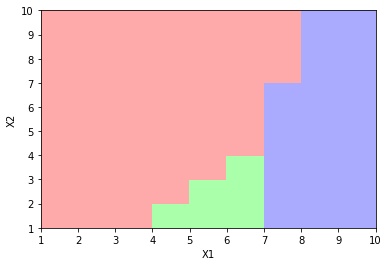

In [16]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])   
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])   

X1, X2 = np.meshgrid([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
XX = np.column_stack([X1.ravel(), X2.ravel()])
Y = clf.predict(XX)

plt.pcolormesh(X1, X2, Y.reshape(X1.shape), cmap=cmap_light)
plt.xlabel('X1')
plt.ylabel('X2')

### 실제 Data 를 이용한 결정 경계 시각화

In [17]:
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1       # petal 의 최소, 최대값
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1       # sepal 의 최소, 최대값
X1, X2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
XX = np.column_stack([X1.ravel(), X2.ravel()])
Y = clf.predict(XX)

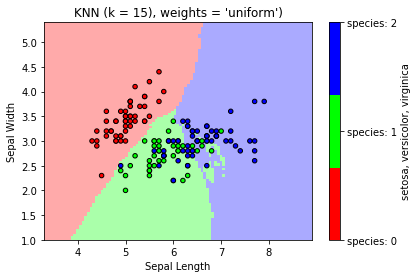

In [25]:
plt.pcolormesh(X1, X2, Y.reshape(X1.shape), cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)    # true value (label) data 표시

plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title("KNN (k = 15), weights = 'uniform')")
plt.colorbar(ticks=[0, 1, 2], format='species: %d', label='setosa, versicolor, virginica');